## I. Introduction to Generative AI and LLMs

Generative AI is a type of artificial intelligence that can produce various types of content, including text, images, audio, and synthetic data. Unlike discriminative AI, which classifies or predicts based on input, generative AI creates new, original outputs.

Large Language Models (LLMs) are a prominent application of Generative AI. These models are trained on vast amounts of text data and can understand, generate, and manipulate human language. They are capable of tasks such as text generation, summarization, translation, and question answering.

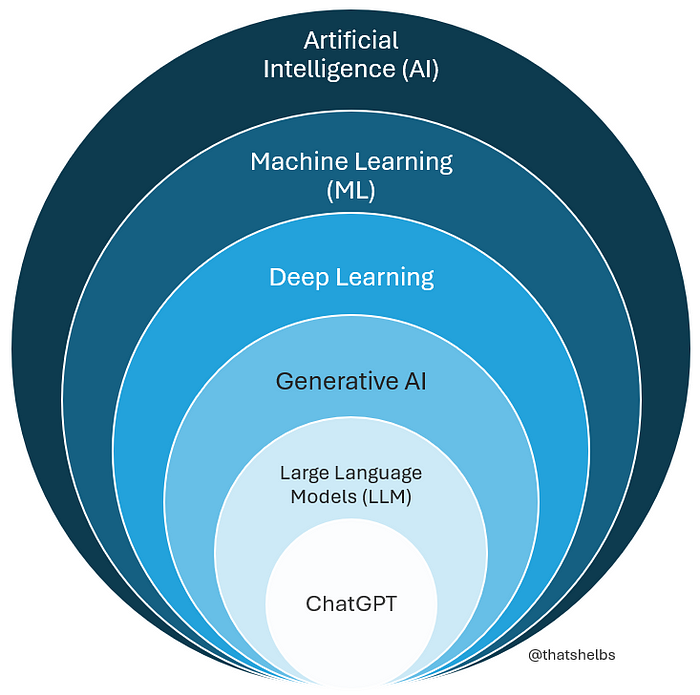

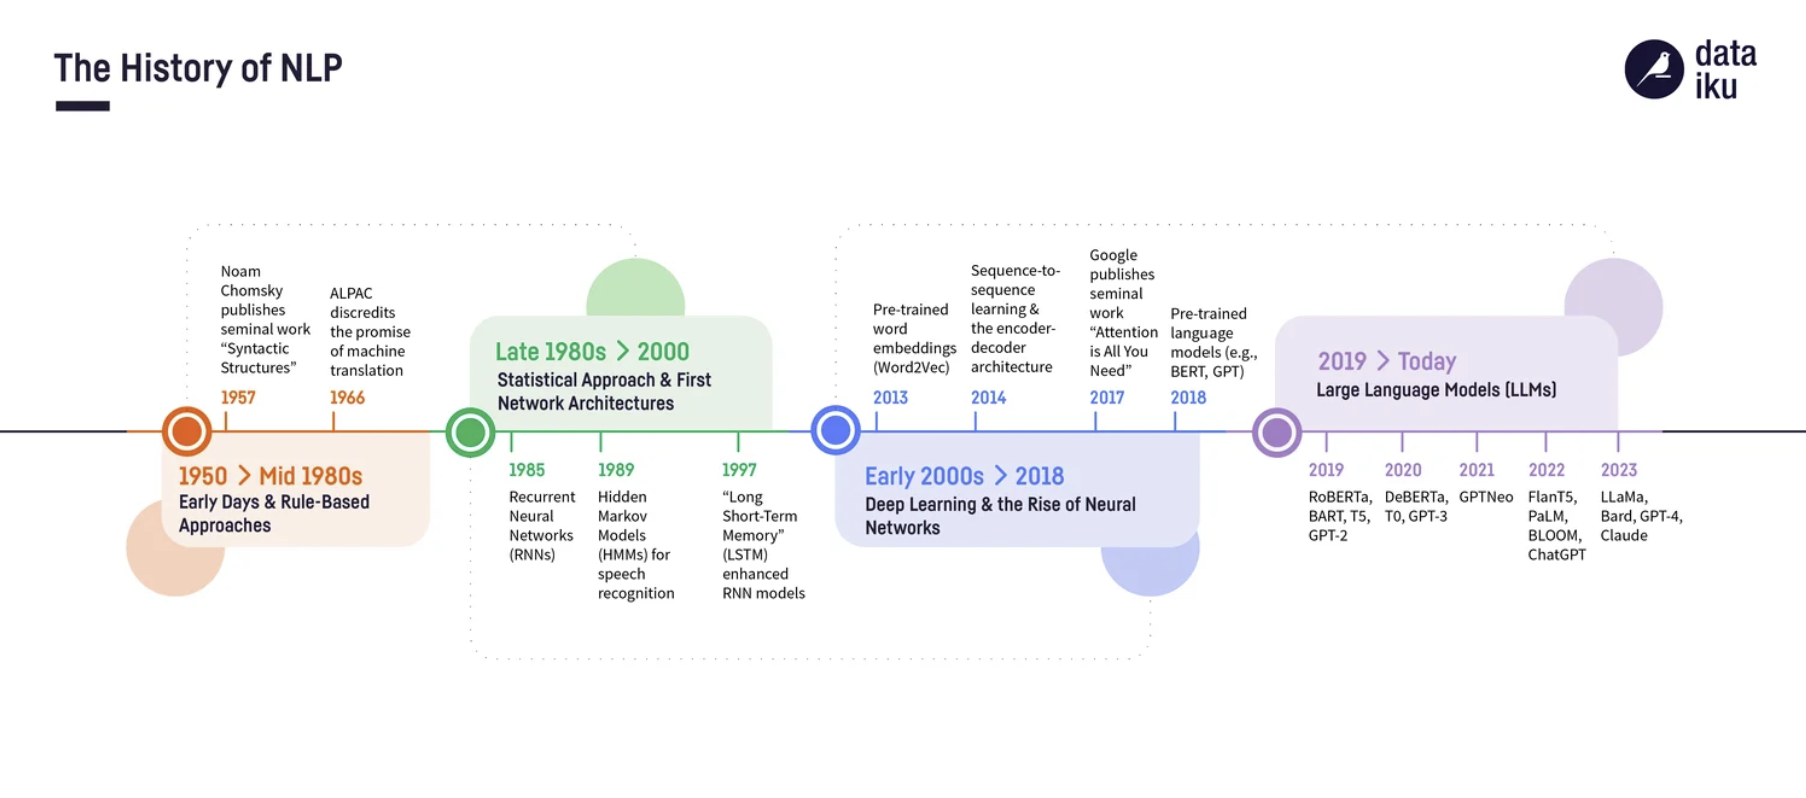

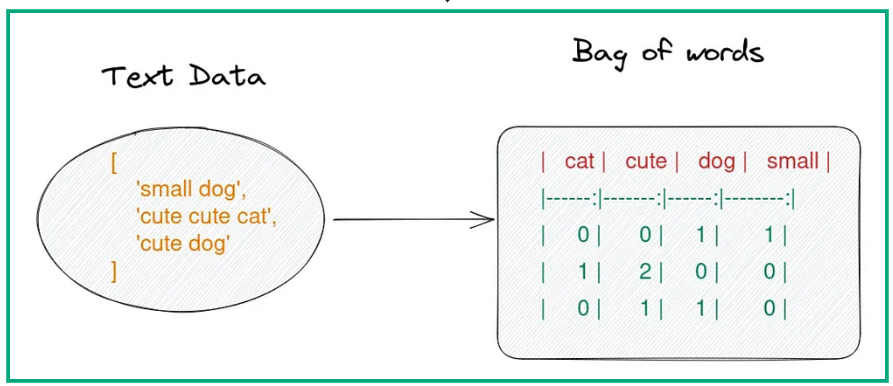

The ability of LLMs to process and generate human-like text relies heavily on how they interpret and represent language. This starts with a fundamental process called tokenization.

## II. Tokenization: The Language of LLMs

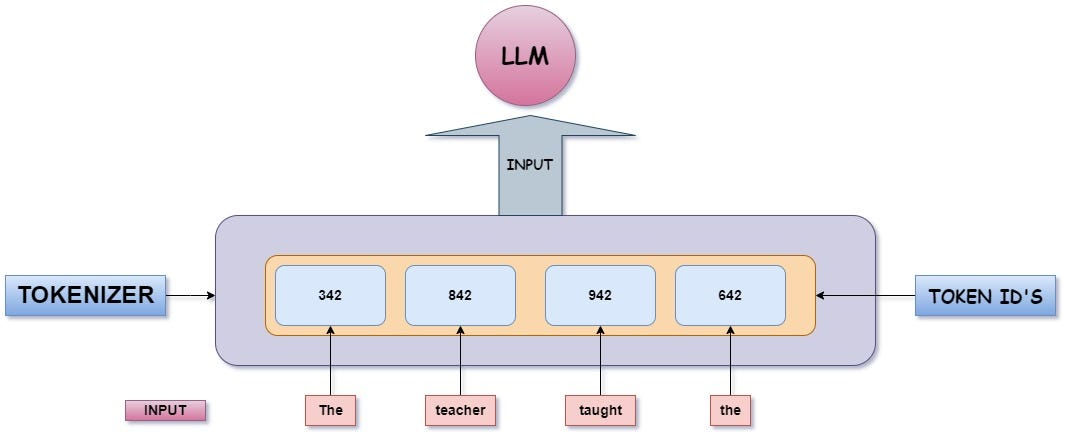

### Theory
**What is Tokenization?**
Tokenization is the process of breaking down raw text into smaller units called **tokens**. These tokens are the fundamental building blocks that Large Language Models (LLMs) process. Think of it like deconstructing a complex Lego structure into its individual bricks. Just as intricate Lego models are built from individual bricks, LLMs process and generate language using these tokens.

**Why is it crucial for LLMs?**
Computers don't understand human language directly. Tokenization converts human-readable text into a numerical format that machine learning models can process. The choice of tokenization method significantly impacts an LLM's vocabulary size, its ability to handle unseen words, and its overall efficiency and performance.

### Different Types of Tokenization
There are several approaches to tokenization, each with its own advantages and disadvantages:

1.  **Character Tokenization:**
    *   Breaks text down into individual characters. Each character is a token.
    *   **Pros:** Handles out-of-vocabulary (OOV) words naturally (as every character is known). Smallest vocabulary size.
    *   **Cons:** Produces very long sequences, increasing computational cost. Loses semantic meaning at the word level.

2.  **Word Tokenization:**
    *   Splits text into words based on whitespace or punctuation. Each word is a token.
    *   **Pros:** Intuitive and aligns well with human understanding of language.
    *   **Cons:** Struggles with Out-Of-Vocabulary (OOV) words (words not seen during training). Can lead to a very large vocabulary size for rich languages. Doesn't handle morphological variations well (e.g., 'run', 'running', 'ran' are distinct tokens).

3.  **Subword Tokenization (Hybrid Approach):**
    *   This is the most common approach in modern LLMs. It aims to strike a balance between character and word tokenization by breaking words into smaller, meaningful subword units (e.g., 'un' + 'happy'). This approach helps manage vocabulary size and handle OOV words effectively.
    *   **Key Algorithms:**
        *   **Byte Pair Encoding (BPE):** Iteratively merges the most frequent adjacent character or subword pairs until a predefined vocabulary size is reached. Starts with a vocabulary of individual characters. Used in models like GPT-2 and RoBERTa.
        *   **WordPiece:** Similar to BPE but selects the pair that maximizes the likelihood of the training data when merged. Used in models like BERT and DistilBERT.
        *   **SentencePiece:** A language-agnostic tokenizer that treats the input as a raw stream of characters, including whitespace, and learns subword units. It can handle different languages without pre-tokenization. Used in models like T5 and XLNet.

### Differences and Impact on LLMs
*   **Vocabulary Size:** Subword tokenization methods effectively manage vocabulary size, preventing it from becoming too large (like word tokenization) or too small (like character tokenization).
*   **Handling OOV Words:** Subword tokenization is crucial for LLMs as it allows models to process and generate words they haven't explicitly seen during training by breaking them into known subword units.
*   **Computational Efficiency:** Subword tokenization offers a good balance, leading to more efficient processing for LLMs compared to the extremes of character or word tokenization.
*   **Contextual Understanding:** The way text is tokenized directly influences how the model learns contextual relationships between words and subwords, which is fundamental for generative tasks.

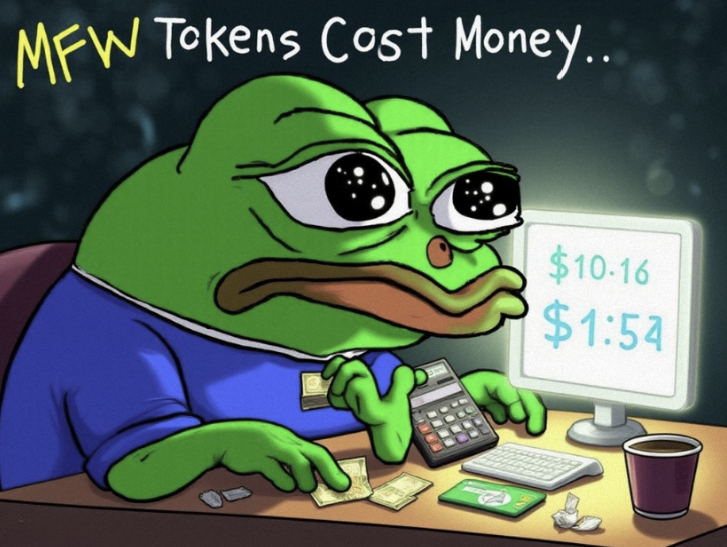

### Exercise: Exploring Tokenization with Hugging Face Transformers
In this exercise, we will use the `transformers` library to observe how different tokenizers process the same text. We'll compare a simple whitespace tokenizer, a BERT tokenizer (WordPiece), and a GPT-2 tokenizer (BPE).

In [ ]:
# Install a library
!pip install transformers sentence-transformers bertviz faiss-cpu

In [ ]:
# Import the library
from transformers import AutoTokenizer

In [ ]:
# Assign a variable
text = "Generative AI is revolutionizing how we interact with technology."

In [ ]:
# Simple warmup to get started with Python :)
# Print the string
print(__)

In [ ]:
# Call a variable
print(f"Text: {__}")

#### 1. Whitespace Tokenization (simple Python split)

In [ ]:
whitespace_tokens = __

In [ ]:
print(f"Text: {text}")
print(f"Tokens: {whitespace_tokens}")
print(f"Number of tokens: {len(whitespace_tokens)}")

#### 2. BERT Tokenization (WordPiece)

BERT uses WordPiece tokenization, which is a subword-based approach built on a fixed vocabulary of common words and statistically chosen subword fragments. When a word isn’t in the vocabulary, it is broken into smaller subword units prefixed with “##” to indicate continuation (e.g., “tokenization” → “token”, “##ization”). This method helps BERT handle rare or unknown words while maintaining strong alignment with linguistic structure, which is useful for its bidirectional understanding of context.

In [ ]:
bert_tokenizer = __

In [ ]:
bert_tokens = __

In [ ]:
# 1. How many tokens are there?
# INSERT YOUR CODE HERE

#### 3. GPT-2 Tokenization (BPE)

GPT-2 uses Byte-Pair Encoding (BPE), but crucially it applies BPE at the byte level. This means GPT-2’s tokenizer operates on raw bytes and merges them into subwords based on frequency, without any special handling for word boundaries or Unicode complexities. As a result, GPT-2 can represent virtually any text—including emojis and non-Latin scripts—without out-of-vocabulary issues. This flexibility pairs well with GPT-2’s autoregressive nature, where generating smooth, continuous text benefits from a tokenizer that is both compact and capable of representing nuanced character sequences.

In [ ]:
# 2. Use the "gpt2" tokenizer. How many tokens?
# INSERT YOUR CODE HERE

#### Extra: Tokenization Widget

Use this prompt:
> Write Python code for a Jupyter notebook that uses ipywidgets to visualize how text is tokenized by whitespace, BERT, and GPT-2 tokenizers.
The code should display tokens in different colors using HTML and update interactively when the user types a new sentence.
Keep it simple and output only the code for the function.

In [ ]:
# 3. Paste the output of the LLM

## III. Embeddings: Representing Meaning

### Theory
**What are Embeddings?**
In the realm of Natural Language Processing (NLP), **embeddings** are numerical representations of text (words, phrases, sentences, or even entire documents) in a continuous vector space. These vectors are designed such that words or sentences with similar meanings are located closer to each other in this multi-dimensional space.

**From Words to Sentences:**
*   **Word Embeddings:** Historically, the concept began with word embeddings (e.g., Word2Vec, GloVE), where individual words are mapped to vectors. These vectors capture semantic relationships, allowing for analogies like "king - man + woman = queen".
*   **Sentence Embeddings:** Building upon word embeddings, **sentence embeddings** represent entire sentences as fixed-size numerical vectors. The crucial aspect of sentence embeddings is their ability to capture the semantic meaning of the *entire sentence*, not just the sum of its individual words. This means that sentences conveying similar ideas, even if phrased differently, will have embeddings that are close to each other in the vector space.

**How Sentence Embeddings Capture Semantic Meaning:**
Advanced models learn to encode the context, syntax, and semantics of a sentence into a dense vector. This is achieved by training on massive text datasets, often using tasks that require understanding sentence relationships (e.g., predicting the next sentence, identifying paraphrases).

### Overview of Different Embedding Approaches
1.  **Averaging Word Embeddings (Simple Approach):**
    *   The simplest way to get a sentence embedding is to average the word embeddings of all words in the sentence. While easy, this method often loses important semantic and syntactic information and doesn't account for word order or the relative importance of words.

2.  **Contextualized Embeddings (e.g., ELMO, BERT):**
    *   These models generate word embeddings that are dynamic and depend on the context in which the word appears in a sentence. For example, the word "bank" would have different embeddings in "river bank" vs. "financial bank". A sentence embedding can then be derived from these contextualized word embeddings (e.g., by taking the embedding of a special token like `[CLS]` in BERT or averaging the output of the last layer).

3.  **Sentence Transformer Models (e.g., SBERT):**
    *   These models are specifically designed to produce semantically meaningful sentence embeddings. They are often fine-tuned on NLI (Natural Language Inference) datasets to ensure that similar sentences are mapped to nearby points in the vector space. **Sentence-BERT (SBERT)** is a popular example that fine-tunes BERT (or other transformer models) to produce highly effective sentence embeddings for similarity tasks. We will focus on using SBERT for our practical application due to its efficiency and performance.

### Exercise: Generating Sentence Embeddings
We will use the `sentence-transformers` library to generate embeddings for a few sentences. This library provides easy access to many pre-trained models, including SBERT.

In [ ]:
from sentence_transformers import SentenceTransformer
import torch

# Load a pre-trained sentence transformer model
# 'all-MiniLM-L6-v2' is a good general-purpose model, relatively small and fast
model = __

In [ ]:
# Define some sentences
sentences = [
    "The cat sat on the mat.",
    "A feline rested on the rug.",
    "The dog chased the ball.",
    "Artificial intelligence is transforming industries.",
    "Machine learning is a subset of AI."
]

In [ ]:
# Generate embeddings
# The .encode() method handles tokenization and model inference
sentence_embeddings = model.encode(sentences)

In [ ]:
print(f"Number of sentences: {len(sentences)}")
print(f"Shape of embeddings tensor: {sentence_embeddings.shape}")
print(f"Example embedding for '{sentences[0]}':{sentence_embeddings[0][:10]}... (showing first 10 dimensions)")

# 4. Observe the shape of the `sentence_embeddings` tensor. What do the dimensions represent?
# 5. Try changing the `SentenceTransformer` model to another one (e.g., 'all-mpnet-base-v2'). How does the shape of the embeddings change? (You might need to install it if not already cached)

Use this prompt:


> Write a Python script that uses PCA to reduce high-dimensional sentence embeddings (e.g., 768-dimensional vectors) to 2D and visualize them with Matplotlib. Each point should represent a sentence, and the plot should include annotations with the sentence text. Include axis labels, title, and a grid.


In [ ]:
# 6. Paste the output of the LLM
# The LLM might suggest other sentences as an example; use the sentences and embeddings that we defined.

In [ ]:
# 7. Try adding a sentence in another language. What happens?

### [Hugging Face credentials]

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import os
from dotenv import load_dotenv

env_path = "/content/drive/MyDrive/.env"
load_dotenv(env_path)

HF_TOKEN = os.getenv('HF_TOKEN')

Gemma is a family of lightweight, open, and efficient large language models developed by Google with the goal of making high-quality AI more accessible to researchers, developers, and smaller organizations. Designed to be compact enough to run on consumer-grade GPUs or even some edge devices, Gemma models balance strong reasoning and language capabilities with low computational requirements. They are trained on a curated mixture of web, code, and multilingual data, and released with transparent documentation that emphasizes safety and responsible use. Because of their small size and permissive licensing, Gemma models are popular for fine-tuning, experimentation, and deploying AI systems where speed, cost, or privacy constraints make larger models impractical.

In [ ]:
model = SentenceTransformer("google/embeddinggemma-300m", token=HF_TOKEN)

In [ ]:
# 8. Generate embeddings using the encode method
# INSERT YOUR CODE HERE

In [ ]:
print(f"Number of sentences: {len(sentences)}")
print(f"Shape of embeddings tensor: {sentence_embeddings.shape}")
print(f"Example embedding for '{sentences[0]}':{sentence_embeddings[0][:10]}... (showing first 10 dimensions)")

In [ ]:
# 9. Use the same visualization script as before to show Gemma embeddings
# INSERT YOUR CODE HERE

## IV. Calculating Similarity: Finding Relatedness

### Theory
Once sentences are converted into numerical vectors (embeddings), we can quantify how "similar" they are by measuring the distance or angle between their respective vectors in the multi-dimensional embedding space. The closer two vectors are, the more semantically similar their corresponding sentences are considered to be.

### Cosine Similarity
The most common and effective method for calculating similarity between sentence embeddings is **Cosine Similarity**.

*   **Description:** Cosine similarity measures the cosine of the angle between two non-zero vectors in a multi-dimensional space. It determines whether two vectors are pointing in roughly the same direction.

*   **Formula:**
    ```
    cosine_similarity(A, B) = (A ⋅ B) / (||A|| ⋅ ||B||)
    ```
    Where:
    *   `A ⋅ B` is the dot product of vectors A and B.
    *   `||A||` and `||B||` are the magnitudes (Euclidean norms) of vectors A and B.

*   **Interpretation:**
    *   A value of **1** indicates that the vectors are identical in direction (maximum similarity). This means the sentences have almost the same meaning.
    *   A value of **0** indicates orthogonality (no similarity). The sentences are unrelated.
    *   A value of **-1** indicates that the vectors are diametrically opposed (maximum dissimilarity). The sentences have opposite meanings.

*   **Why it's preferred for embeddings:** Cosine similarity is particularly well-suited for high-dimensional data like embeddings because it is sensitive to the *orientation* of the vectors rather than their *magnitude*. In semantic spaces, the direction of a vector often carries more meaning about semantic content than its length. It effectively captures the semantic closeness of sentences, making it ideal for tasks like semantic search, clustering, and paraphrase detection.

### Exercise: Calculating Cosine Similarity
Using the embeddings generated in the previous section, we will now calculate the cosine similarity between different pairs of sentences.

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

In [ ]:
sentences

In [ ]:
# Pair 1: Very similar sentences
sentence_a_idx = 0
sentence_b_idx = 1
similarity_1 = cosine_similarity(sentence_embeddings[sentence_a_idx].reshape(1, -1), sentence_embeddings[sentence_b_idx].reshape(1, -1))[0][0]
print(f"Similarity between '{sentences[sentence_a_idx]}' and '{sentences[sentence_b_idx]}' : {similarity_1:.4f}")

In [ ]:
# Pair 2: Dissimilar sentences
sentence_c_idx = 0
sentence_d_idx = 2
similarity_2 = cosine_similarity(sentence_embeddings[sentence_c_idx].reshape(1, -1), sentence_embeddings[sentence_d_idx].reshape(1, -1))[0][0]
print(f"Similarity between '{sentences[sentence_c_idx]}' and '{sentences[sentence_d_idx]}' : {similarity_2:.4f}")

In [ ]:
# Pair 3: Related but not identical topics
sentence_e_idx = 3
sentence_f_idx = 4
similarity_3 = cosine_similarity(sentence_embeddings[sentence_e_idx].reshape(1, -1), sentence_embeddings[sentence_f_idx].reshape(1, -1))[0][0]
print(f"Similarity between '{sentences[sentence_e_idx]}' and '{sentences[sentence_f_idx]}' : {similarity_3:.4f}")

In [ ]:
# Exercise Challenge:
# 10. Experiment with different pairs of sentences from the `sentences` list. What do you observe about their similarity scores?
# 11. Add a new sentence to the list that is a complete paraphrase of an existing one. How high is its similarity score?
# 12. Add a sentence that is completely unrelated to any other. What is its similarity score like?

### Compact alternative

In [ ]:
text_a = 'The cat sat on the mat.'
text_b = 'A feline rested on the rug.'

# Encode the two texts into embeddings.
# `normalize_embeddings=True` is crucial as it ensures the vectors are of unit length,
# which means their dot product will be equivalent to the cosine similarity.
embeddings = model.encode(
    [text_a, text_b],
    normalize_embeddings=True,
    convert_to_numpy=True
)

# The dot product of two normalized vectors is their cosine similarity.
similarity_score = np.dot(embeddings[0], embeddings[1])

print(similarity_score)

## **LAB1: similarity score**
<u>**Download the following files to create an app that computes the similarity score of two sentences:**</u>

In [ ]:
!wget -O app.py https://raw.githubusercontent.com/Bor90/Nuclio_GenAI/refs/heads/main/Labs/Semantic_search/app.py
!wget -O requirements.txt https://raw.githubusercontent.com/Bor90/Nuclio_GenAI/refs/heads/main/Labs/Semantic_search/requirements.txt

<u>**Modify the file app.py and publish it (together with requirements.txt) in your Hugging Face Space.**</u>

In [ ]:
# Verify that your app returns the same similarity score.
from gradio_client import Client

text_a = 'The cat sat on the mat.'
text_b = 'A feline rested on the rug.'

client = Client("https://YOUR_HF_SPACE.hf.space")
result = client.predict(
    text_a,
    text_b,
    api_name="/predict"
)
print(result)

In [ ]:
# Test multiple examples
test_cases = [
    ("hello world", "hello world"),      # Identical - high similarity
    ("hello world", "hello"),             # Similar - medium similarity
    ("cat", "dog"),                       # Different animals - low similarity
    ("machine learning", "AI"),           # Related concepts - medium-high
    ("the weather is sunny", "python"),  # Completely unrelated - low
    ("", "hello"),                        # Empty input - should return 0
]

results = []
for text_a, text_b in test_cases:
    try:
        score = client.predict(text_a, text_b, api_name="/predict")
        results.append({
            "text_a": text_a[:20] + "..." if len(text_a) > 20 else text_a,
            "text_b": text_b[:20] + "..." if len(text_b) > 20 else text_b,
            "similarity": score
        })
        print(f"'{text_a[:20]}' vs '{text_b[:20]}': {score:.4f}")
    except Exception as e:
        print(f"Error evaluating '{text_a}' vs '{text_b}': {e}")

### Extra exercise: clustering

In [ ]:
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

pca = PCA(n_components=2)
embeddings_2d = pca.fit_transform(sentence_embeddings)

num_clusters = 2
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(sentence_embeddings)

In [ ]:
import pandas as pd

df = pd.DataFrame({
    'x': embeddings_2d[:,0],
    'y': embeddings_2d[:,1],
    'sentence': sentences,
    'cluster': cluster_labels.astype(str)
})

fig = px.scatter(
    df, x='x', y='y', text='sentence', color='cluster',
    title='2D Sentence Embeddings with KMeans Clusters',
    hover_data=['sentence', 'cluster'],
    width=800, height=600
)

fig.update_traces(textposition='top center', marker=dict(size=12))
fig.show()

### FAISS (Facebook AI Similarity Search)

FAISS is a powerful library developed by Meta specifically for fast vector similarity search and clustering. It’s designed to handle large collections of high-dimensional embeddings—such as those generated by language or image models—and enables you to efficiently retrieve the most similar items using metrics like cosine similarity or inner product. Unlike brute-force comparison methods, FAISS accelerates search using optimized data structures and hardware support (including GPU), making it ideal for building semantic search engines, recommendation systems, or deduplication tools. In short, FAISS is the go-to solution when you want to find “the most similar items” quickly—even across millions of vectors.

### Exercise: FAISS

In [ ]:
import faiss
import numpy as np

# Convert embeddings to float32 (FAISS requirement)
embeddings = sentence_embeddings.astype(np.float32)

# Create a cosine-similarity-like index (Inner Product + Normalization Trick)
index = faiss.IndexFlatIP(embeddings.shape[1])

# Normalize embeddings so dot product == cosine similarity
faiss.normalize_L2(embeddings)

# Add the embeddings to the index
index.add(embeddings)

In [ ]:
query_idx = 0  # pick first sentence
query_vec = embeddings[query_idx].reshape(1, -1)

# Search top-3 nearest neighbors
scores, indices = index.search(query_vec, k=3)

print(f"\n--- FAISS Search Results for: '{sentences[query_idx]}' ---")
for score, idx in zip(scores[0], indices[0]):
    print(f"Score: {score:.4f} | Match: {sentences[idx]}")

In [ ]:
query_idx = 0
other_idx = 1
scores, indices = index.search(embeddings[query_idx].reshape(1, -1), k=2)
faiss_similarity = scores[0][1]  # second-best match (first is itself)
print(f"FAISS similarity between '{sentences[query_idx]}' and '{sentences[other_idx]}' : {faiss_similarity:.4f}")

For building a search engine:
Use model.encode_document() to create the embeddings for all the documents you want to make searchable.
Use model.encode_query() to encode the user's search term right before you perform the search.

In [ ]:
# Use FAISS search to find the answer to a query
new_sentence = "Where is the cat?"

# You have to encode the query, get the top-3 results and display the similarity scores
# INSERT YOUR CODE HERE

## **LAB2: Semantic Search**
<u>**Download the corpus and pre-computed index:**</u>

In [ ]:
!wget -O faiss_ip_768.index https://raw.githubusercontent.com/Bor90/Nuclio_GenAI/refs/heads/main/Labs/Semantic_search/faiss_ip_768.index
!wget -O corpus.json https://raw.githubusercontent.com/Bor90/Nuclio_GenAI/refs/heads/main/Labs/Semantic_search/corpus.json

In [ ]:
import pandas as pd

file_path = ('corpus.json')
data = pd.read_json(file_path)
data

<u>**Modify the previous app to include the semantic search Tab and publish it in your Hugging Face Space.**</u>